In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

train_df = pd.read_csv("input/train.csv")
submit_df = pd.read_csv("input/test.csv")

train_df

id  feature_0  feature_1  feature_2  feature_3  feature_4  \
0          0          0          0          1          0          1   
1          1          0          0          0          0          2   
2          2          0          0          0          0          0   
3          3          0          0          0          0          0   
4          4          0          0          0          0          0   
...      ...        ...        ...        ...        ...        ...   
99995  99995          0          0          0          1          0   
99996  99996          0          0          0          0          0   
99997  99997          0          0          0          0          0   
99998  99998          0          0          0          0          1   
99999  99999          0          0          0          0          0   

       feature_5  feature_6  feature_7  feature_8  ...  feature_41  \
0              0          0          0          0  ...           0   
1              1          0          0          0  ...           0   
2              0          0          0          0  ...           0   
3              0          0          3          0  ...           0   
4              0          0          0          0  ...           0   
...          ...        ...        ...        ...  ...         ...   
99995          0          0          2          0  ...           0   
99996          0          0          1          2  ...           0   
99997          1          0          0          0  ...           0   
99998          0          0          0          0  ...           0   
99999          0          0          0          0  ...           0   

       feature_42  feature_43  feature_44  feature_45  feature_46  feature_47  \
0               0          21           0           0           0           0   
1               0           0           0           0           0           0   
2               1           0           0           0           0          13   
3               0           0           0           0           0           0   
4               0           0           0           0           0           0   
...           ...         ...         ...         ...         ...         ...   
99995           0           6           0           0           3           0   
99996           2           0           0           0          10           0   
99997           0           0           0           1           0           0   
99998           0           0           0           0           1           0   
99999           5           0           0           0           1           0   

       feature_48  feature_49   target  
0               0           0  Class_2  
1               0           0  Class_1  
2               2           0  Class_1  
3               1           0  Class_4  
4               1           0  Class_2  
...           ...         ...      ...  
99995           0           0  Class_1  
99996           0           0  Class_2  
99997           2           0  Class_3  
99998           4           0  Class_2  
99999           0           8  Class_3  

[100000 rows x 52 columns]

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 52 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          100000 non-null  int64 
 1   feature_0   100000 non-null  int64 
 2   feature_1   100000 non-null  int64 
 3   feature_2   100000 non-null  int64 
 4   feature_3   100000 non-null  int64 
 5   feature_4   100000 non-null  int64 
 6   feature_5   100000 non-null  int64 
 7   feature_6   100000 non-null  int64 
 8   feature_7   100000 non-null  int64 
 9   feature_8   100000 non-null  int64 
 10  feature_9   100000 non-null  int64 
 11  feature_10  100000 non-null  int64 
 12  feature_11  100000 non-null  int64 
 13  feature_12  100000 non-null  int64 
 14  feature_13  100000 non-null  int64 
 15  feature_14  100000 non-null  int64 
 16  feature_15  100000 non-null  int64 
 17  feature_16  100000 non-null  int64 
 18  feature_17  100000 non-null  int64 
 19  feature_18  100000 non-n

In [4]:
train_df.describe()

id      feature_0      feature_1      feature_2  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    49999.500000       0.257830       0.431720       0.114130   
std     28867.657797       0.929033       1.977862       0.519584   
min         0.000000       0.000000       0.000000       0.000000   
25%     24999.750000       0.000000       0.000000       0.000000   
50%     49999.500000       0.000000       0.000000       0.000000   
75%     74999.250000       0.000000       0.000000       0.000000   
max     99999.000000      10.000000      31.000000       6.000000   

           feature_3      feature_4      feature_5      feature_6  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.590550       0.599770       0.160820       0.731490   
std         1.844558       2.785531       0.601149       2.343465   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max        26.000000      38.000000      10.000000      27.000000   

           feature_7      feature_8  ...     feature_40     feature_41  \
count  100000.000000  100000.000000  ...  100000.000000  100000.000000   
mean        1.228920       0.903350  ...       0.712270       0.582070   
std         2.692732       3.415258  ...       1.721863       2.003114   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       0.000000   
50%         0.000000       0.000000  ...       0.000000       0.000000   
75%         1.000000       0.000000  ...       1.000000       0.000000   
max        31.000000      39.000000  ...      21.000000      32.000000   

          feature_42     feature_43     feature_44     feature_45  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.529230       0.616310       0.135100       0.358660   
std         2.300826       2.360955       0.627592       1.464187   
min        -2.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max        37.000000      33.000000       9.000000      26.000000   

          feature_46    feature_47     feature_48    feature_49  
count  100000.000000  100000.00000  100000.000000  100000.00000  
mean        0.516810       0.39004       0.970850       0.55712  
std         2.171415       1.48735       2.576615       1.68093  
min         0.000000       0.00000       0.000000       0.00000  
25%         0.000000       0.00000       0.000000       0.00000  
50%         0.000000       0.00000       0.000000       0.00000  
75%         0.000000       0.00000       1.000000       0.00000  
max        29.000000      25.00000      44.000000      20.00000  

[8 rows x 51 columns]

/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

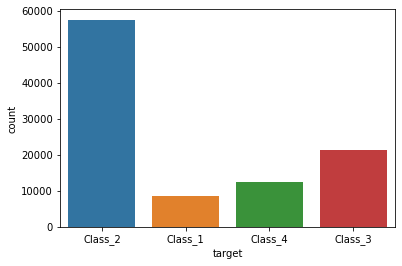

In [5]:
sns.countplot(train_df["target"])

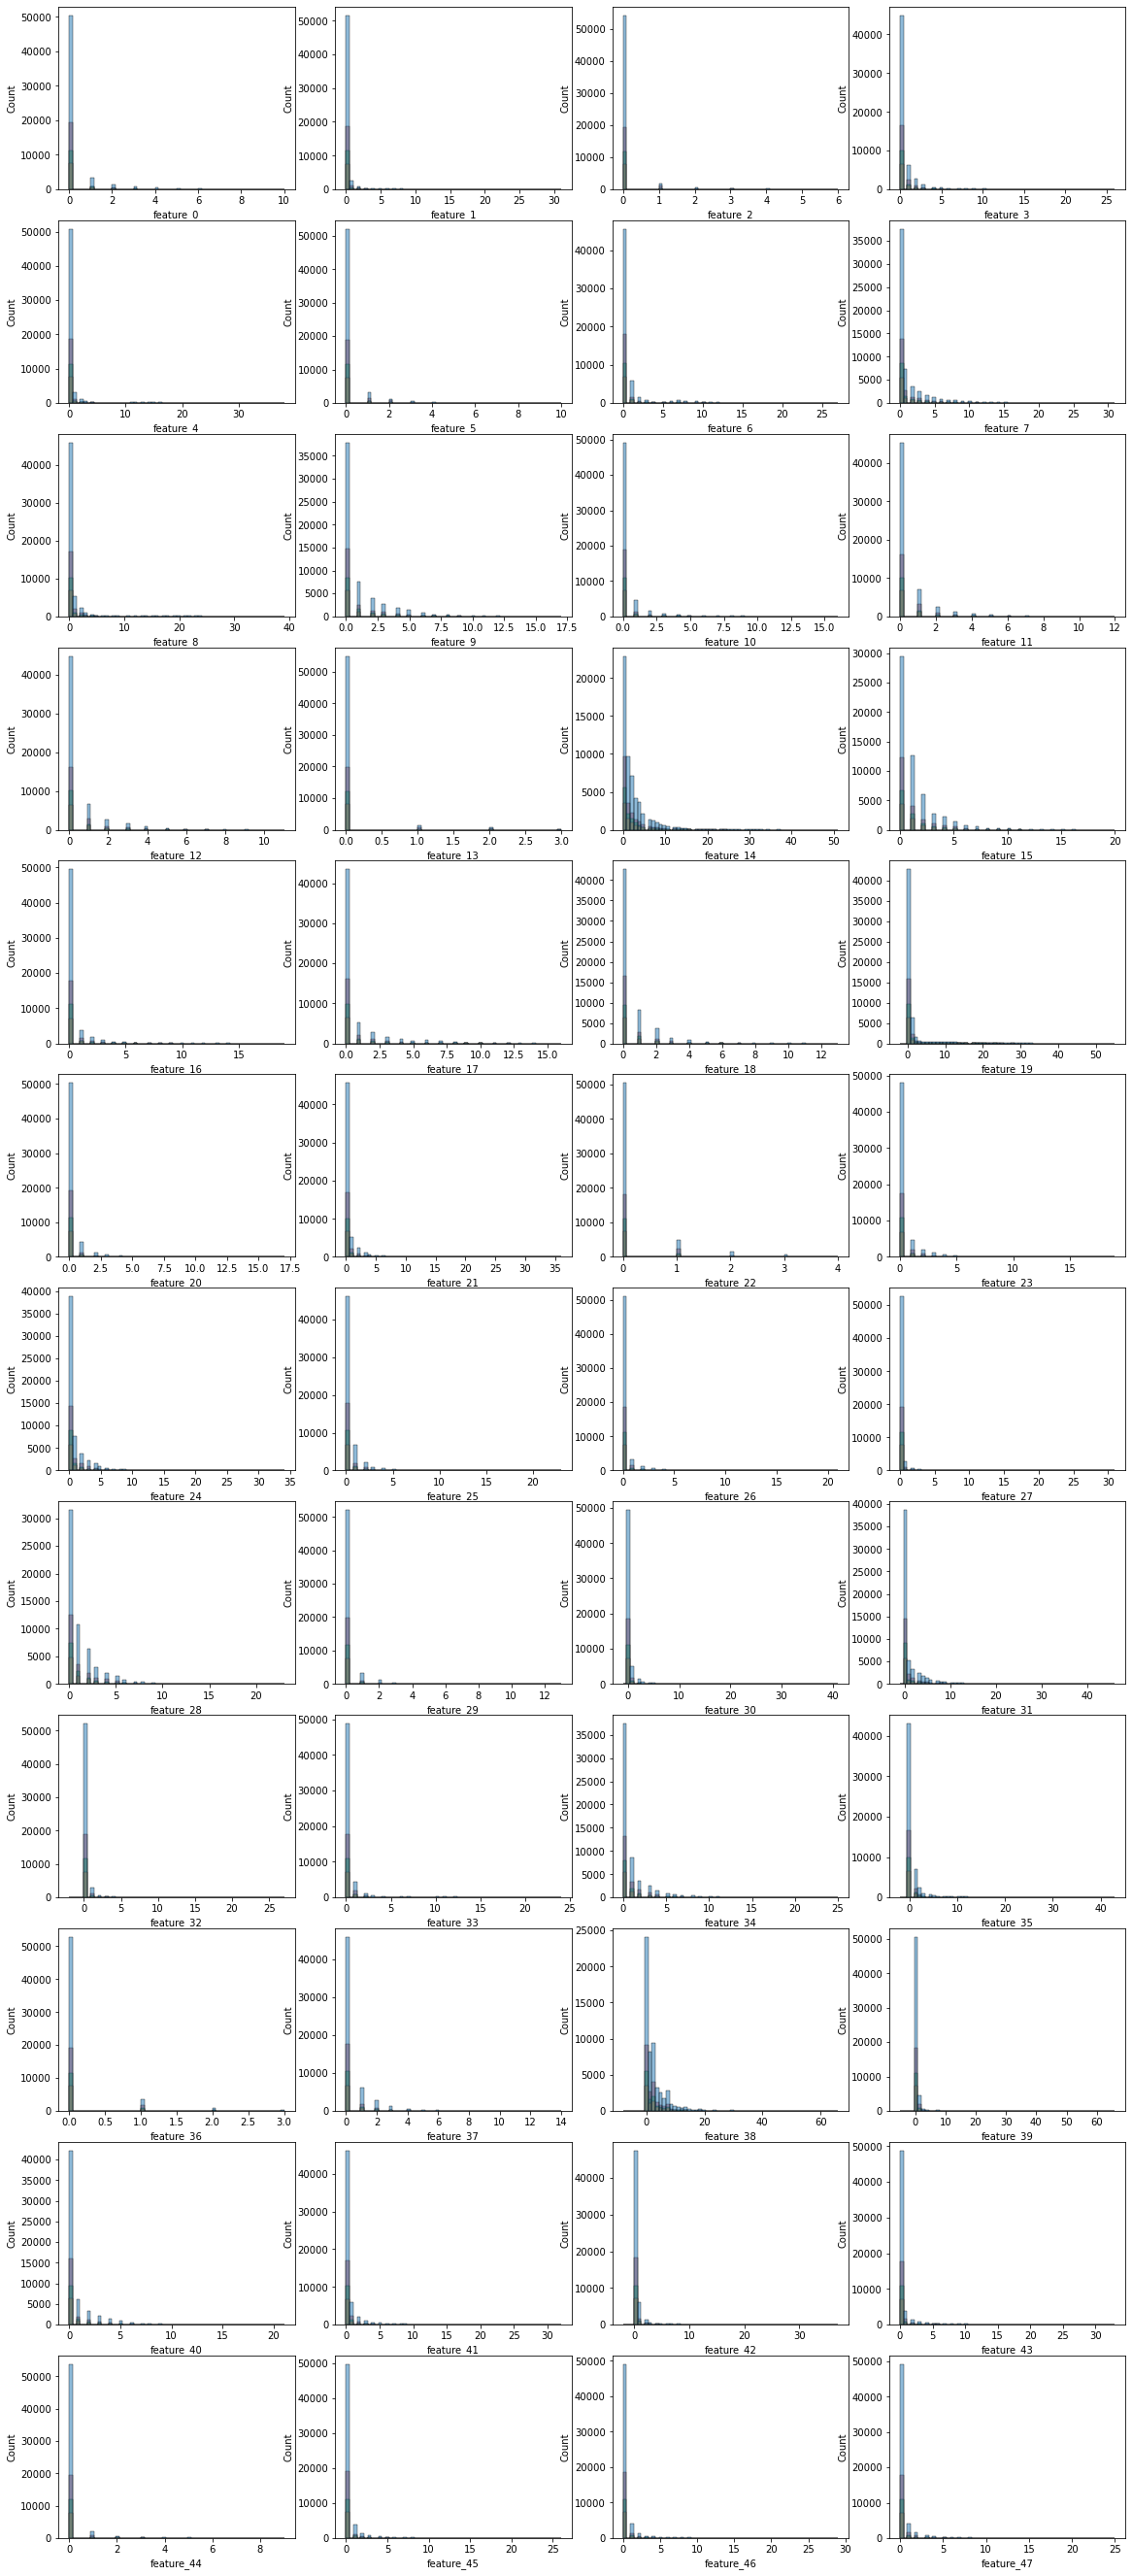

In [6]:
# histograms of all features

fig, axes = plt.subplots(12, 4)
fig.set_size_inches(16, 40)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

for i, ax in zip(range(49), axes.flat):
    sns.histplot(data=train_df, x=f"feature_{i}", hue="target",bins=60, ax=ax, legend=False)


In [ ]:
# Correlation Plot 

fig = plt.figure(figsize = (12,9))
matrix = np.triu(train_df.corr())
sns.heatmap(round(train_df.corr(),2), vmin=-1, vmax=1, center=0, square=True,
            annot=True, cmap='RdYlGn', mask=matrix)
plt.title('Feature Correlation Heatmap')
plt.savefig("img_export/feature_correlation_plot.jpg")

### Feature Scaling

In [7]:
X_train = train_df.drop(columns=["target", "id"])
y_train = train_df.target

X_submit = submit_df.drop(columns=["id"])

In [8]:
# Standardize numeric features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_trans = scaler.fit_transform(X_train)
X_submit_trans = scaler.transform(X_submit)

## 1. Baseline Model
Start with no feature engineering a a few standard models for a baseline performance

/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/skle

<AxesSubplot:xlabel='model_name', ylabel='accuracy'>

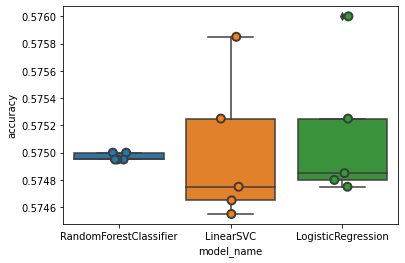

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(max_iter=1000),
    LogisticRegression(random_state=0),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train_trans, y_train, scoring='accuracy', cv=CV)
  
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
        
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])


import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [10]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.57501
LogisticRegression        0.57513
RandomForestClassifier    0.57497
Name: accuracy, dtype: float64

### Split without stratification

In [11]:
from sklearn.model_selection import train_test_split

y_train = train_df.target
X_train, X_test, y_train, y_test = train_test_split(X_train_trans, y_train, test_size=0.33, random_state=42)

In [12]:
y_train.value_counts(normalize=True)

Class_2    0.574388
Class_3    0.212507
Class_4    0.127179
Class_1    0.085925
Name: target, dtype: float64

In [13]:
y_test.value_counts(normalize=True)

Class_2    0.576152
Class_3    0.217636
Class_4    0.123394
Class_1    0.082818
Name: target, dtype: float64

In [14]:
# Standard Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state=42)

rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)

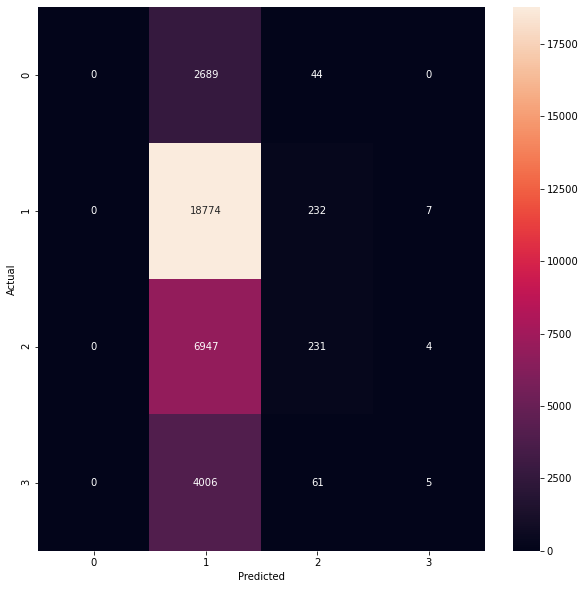

In [15]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig("img_export/confusion_matrix_simple_absolute.jpg")

In [16]:
from sklearn.metrics import f1_score

print("F1 score without stratification: " + str(f1_score(y_test, y_pred, average="weighted")))

F1 score without stratification: 0.4339204955978072


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Class_1       0.00      0.00      0.00      2733
     Class_2       0.58      0.99      0.73     19013
     Class_3       0.41      0.03      0.06      7182
     Class_4       0.31      0.00      0.00      4072

    accuracy                           0.58     33000
   macro avg       0.32      0.26      0.20     33000
weighted avg       0.46      0.58      0.43     33000



/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jonasschroeder/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Use a stratified train-test split for Random Forest training

In [18]:
from sklearn.model_selection import train_test_split

y_train = train_df.target
X_train, X_test, y_train, y_test = train_test_split(X_train_trans, y_train, test_size=0.33, 
                                                    stratify=y_train, random_state=42)

In [19]:
y_train.value_counts(normalize=True)

Class_2    0.574970
Class_3    0.214209
Class_4    0.125925
Class_1    0.084896
Name: target, dtype: float64

In [20]:
y_test.value_counts(normalize=True)

Class_2    0.574970
Class_3    0.214182
Class_4    0.125939
Class_1    0.084909
Name: target, dtype: float64

In [21]:
# Standard Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state=42)

rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)

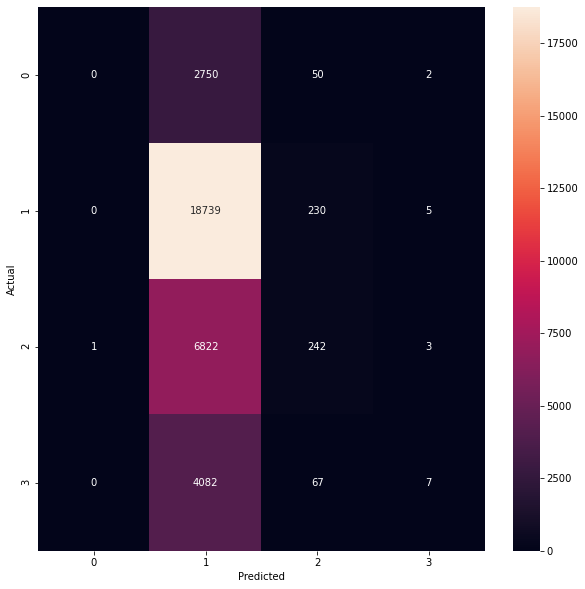

In [22]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig("img_export/confusion_matrix_simple_stratified_absolute.jpg")

In [23]:
from sklearn.metrics import f1_score

print("F1 score without stratification: " + str(f1_score(y_test, y_pred, average="weighted")))

F1 score without stratification: 0.4334659945259754


In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Class_1       0.00      0.00      0.00      2802
     Class_2       0.58      0.99      0.73     18974
     Class_3       0.41      0.03      0.06      7068
     Class_4       0.41      0.00      0.00      4156

    accuracy                           0.58     33000
   macro avg       0.35      0.26      0.20     33000
weighted avg       0.47      0.58      0.43     33000



Stratification does not seem to improve performance. We still move forward with stratified train-test splits. Next we improve the baseline Random Forest model by using Grid Search.

## 2. Improved RF model through RandomizedSearch and GridSearch

Using scoring = roc_auc to not just focus on precision, and class_weight parameter to deal with imbalanced data.

In [25]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

param_dist = {
    'n_estimators': np.arange(100,1500,25),
    'max_features': ['auto', 'sqrt'],
    'max_depth': np.arange(10,1000,10),
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'bootstrap': [True, False]
}

print(param_dist)

{'n_estimators': array([ 100,  125,  150,  175,  200,  225,  250,  275,  300,  325,  350,
        375,  400,  425,  450,  475,  500,  525,  550,  575,  600,  625,
        650,  675,  700,  725,  750,  775,  800,  825,  850,  875,  900,
        925,  950,  975, 1000, 1025, 1050, 1075, 1100, 1125, 1150, 1175,
       1200, 1225, 1250, 1275, 1300, 1325, 1350, 1375, 1400, 1425, 1450,
       1475]), 'max_features': ['auto', 'sqrt'], 'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990]), 'mi

### a) OVO non_weighted

In [26]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(class_weight='balanced')

random_search = RandomizedSearchCV(estimator=rnd_clf, 
                                   param_distributions=param_dist,
                                   scoring='roc_auc_ovo',
                                   n_iter=100,
                                   n_jobs=-1, 
                                   cv=3, 
                                   verbose=10, 
                                   random_state=42)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480...
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 100,  125,  150,  175,  200,  225,  250,  275,  300,  325,  350,
        375,  400,  425,  450,  475,  500,  525,  550,  575,  600,  625,
        650,  675,  700,  725,  750,  775,  800,  825,  850,  875,  900,
        925,  950,  975, 1000, 1025, 1050, 10

In [27]:
print(random_search.best_params_)

{'n_estimators': 1425, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 800, 'bootstrap': True}


In [28]:
print(random_search.best_score_)

0.5659873482941177


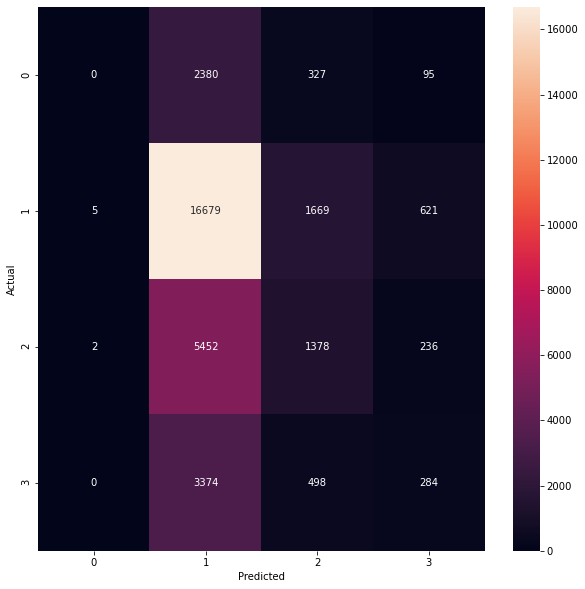

In [29]:
y_pred = random_search.predict(X_test)

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig("img_export/confusion_matrix_ovo_nonweighted_absolute.jpg")

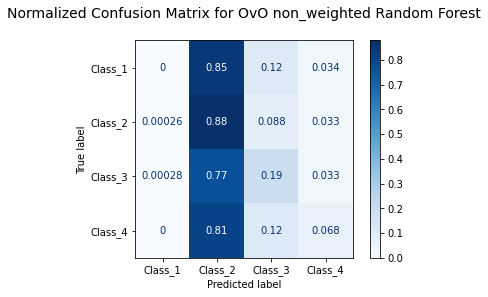

In [30]:
# Plot normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(random_search, X_test, y_test, display_labels=['Class_1','Class_2','Class_3','Class_4'], 
                      cmap=plt.cm.Blues, normalize="true")
plt.title("Normalized Confusion Matrix for OvO non_weighted Random Forest\n", size=14)
plt.savefig("img_export/confusion_matrix_ovr_nonweighted_normalized.jpg")

In [31]:
from sklearn.metrics import f1_score

print("F1 score after random search: " + str(f1_score(y_test, y_pred, average="weighted")))

F1 score after random search: 0.47653281529083746


In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Class_1       0.00      0.00      0.00      2802
     Class_2       0.60      0.88      0.71     18974
     Class_3       0.36      0.19      0.25      7068
     Class_4       0.23      0.07      0.11      4156

    accuracy                           0.56     33000
   macro avg       0.30      0.29      0.27     33000
weighted avg       0.45      0.56      0.48     33000



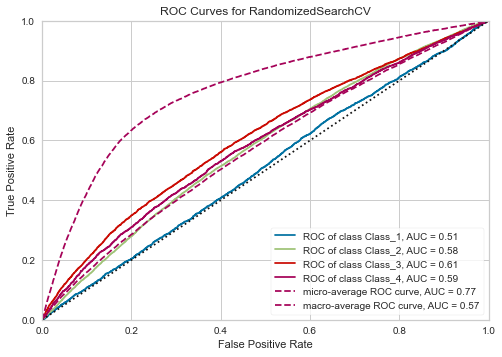

<AxesSubplot:title={'center':'ROC Curves for RandomizedSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [33]:
# multiple ROC curves using yellowbrick
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(random_search, classes=['Class_1','Class_2','Class_3','Class_4'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

### b) OVO weighted

In [34]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(class_weight='balanced')

random_search = RandomizedSearchCV(estimator=rnd_clf, 
                                   param_distributions=param_dist,
                                   scoring='roc_auc_ovo_weighted',
                                   n_iter=100,
                                   n_jobs=-1, 
                                   cv=3, 
                                   verbose=10, 
                                   random_state=42)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480...
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 100,  125,  150,  175,  200,  225,  250,  275,  300,  325,  350,
        375,  400,  425,  450,  475,  500,  525,  550,  575,  600,  625,
        650,  675,  700,  725,  750,  775,  800,  825,  850,  875,  900,
        925,  950,  975, 1000, 1025, 1050, 1075, 1100, 1125, 1150, 1175,
       1200, 1225, 1250, 1275, 1300, 1325, 

In [35]:
print(random_search.best_params_)

{'n_estimators': 750, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}


In [36]:
print(random_search.best_score_)

0.5663423832277242


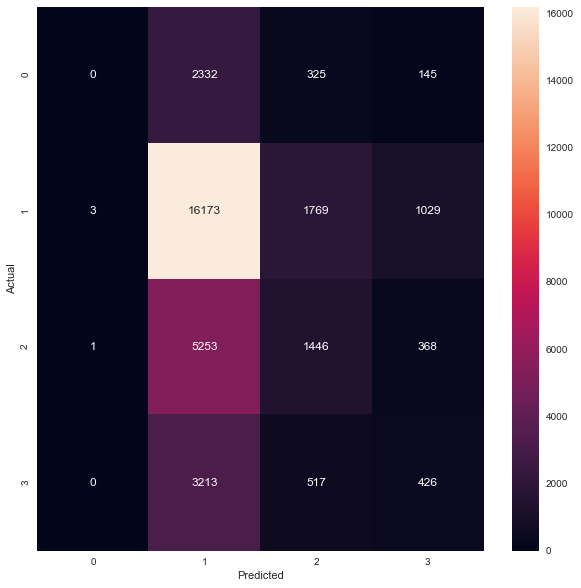

In [37]:
y_pred = random_search.predict(X_test)

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig("img_export/confusion_matrix_ovo_weighted_absolute.jpg")

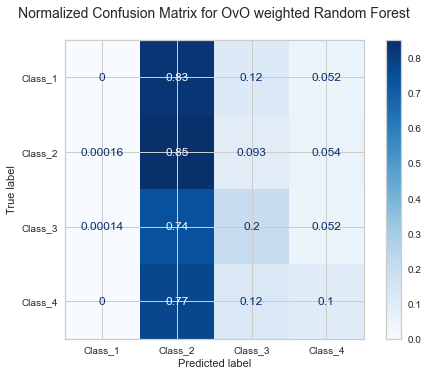

In [38]:
# Plot normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(random_search, X_test, y_test, display_labels=['Class_1','Class_2','Class_3','Class_4'], 
                      cmap=plt.cm.Blues, normalize="true")
plt.title("Normalized Confusion Matrix for OvO weighted Random Forest\n", size=14)
plt.savefig("img_export/confusion_matrix_ovo_weighted.jpg")

In [39]:
from sklearn.metrics import f1_score

print("F1 score after random search: " + str(f1_score(y_test, y_pred, average="weighted")))

F1 score after random search: 0.4779866108781641


In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Class_1       0.00      0.00      0.00      2802
     Class_2       0.60      0.85      0.70     18974
     Class_3       0.36      0.20      0.26      7068
     Class_4       0.22      0.10      0.14      4156

    accuracy                           0.55     33000
   macro avg       0.29      0.29      0.28     33000
weighted avg       0.45      0.55      0.48     33000



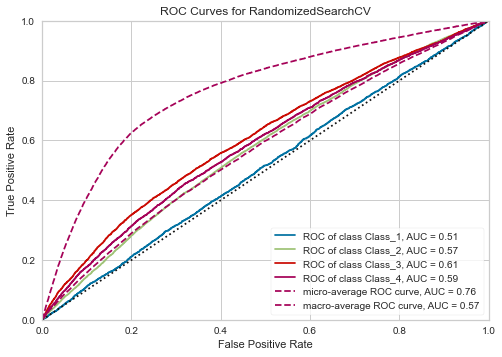

<AxesSubplot:title={'center':'ROC Curves for RandomizedSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [41]:
# multiple ROC curves using yellowbrick
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(random_search, classes=['Class_1','Class_2','Class_3','Class_4'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

### c) OVR non_weighted

In [42]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(class_weight='balanced')

random_search = RandomizedSearchCV(estimator=rnd_clf, 
                                   param_distributions=param_dist,
                                   scoring='roc_auc_ovr',
                                   n_iter=100,
                                   n_jobs=-1, 
                                   cv=3, 
                                   verbose=10, 
                                   random_state=42)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480...
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 100,  125,  150,  175,  200,  225,  250,  275,  300,  325,  350,
        375,  400,  425,  450,  475,  500,  525,  550,  575,  600,  625,
        650,  675,  700,  725,  750,  775,  800,  825,  850,  875,  900,
        925,  950,  975, 1000, 1025, 1050, 10

In [43]:
print(random_search.best_params_)

{'n_estimators': 1450, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 120, 'bootstrap': True}


In [44]:
print(random_search.best_score_)

0.5681185637050593


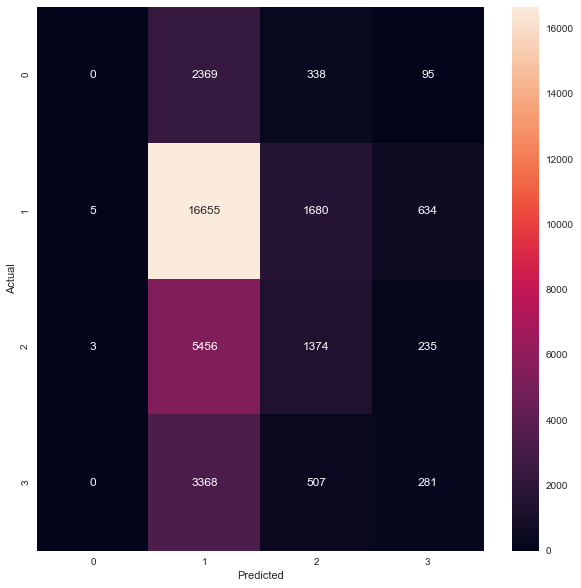

In [45]:
y_pred = random_search.predict(X_test)

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig("img_export/confusion_matrix_ovr_nonweighted_absolute.jpg")

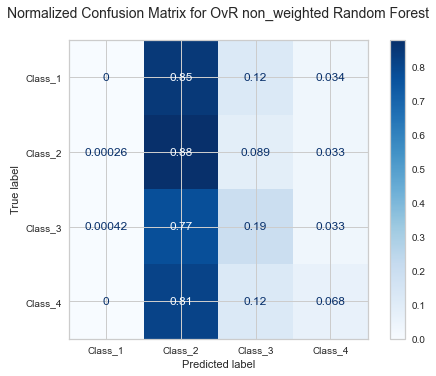

In [46]:
# Plot normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(random_search, X_test, y_test, display_labels=['Class_1','Class_2','Class_3','Class_4'], 
                      cmap=plt.cm.Blues, normalize="true")
plt.title("Normalized Confusion Matrix for OvR non_weighted Random Forest\n", size=14)
plt.savefig("img_export/confusion_matrix_ovr_nonweighted.jpg")

In [47]:
from sklearn.metrics import f1_score

print("F1 score after random search: " + str(f1_score(y_test, y_pred, average="weighted")))

F1 score after random search: 0.4758157388988158


In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Class_1       0.00      0.00      0.00      2802
     Class_2       0.60      0.88      0.71     18974
     Class_3       0.35      0.19      0.25      7068
     Class_4       0.23      0.07      0.10      4156

    accuracy                           0.55     33000
   macro avg       0.29      0.28      0.27     33000
weighted avg       0.45      0.55      0.48     33000



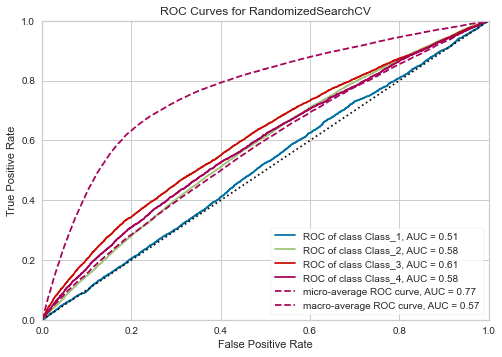

<AxesSubplot:title={'center':'ROC Curves for RandomizedSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [49]:
# multiple ROC curves using yellowbrick
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(random_search, classes=['Class_1','Class_2','Class_3','Class_4'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

### d) OVR weighted

In [50]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(class_weight='balanced')

random_search = RandomizedSearchCV(estimator=rnd_clf, 
                                   param_distributions=param_dist,
                                   scoring='roc_auc_ovr_weighted',
                                   n_iter=100,
                                   n_jobs=-1, 
                                   cv=3, 
                                   verbose=10, 
                                   random_state=42)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480...
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 100,  125,  150,  175,  200,  225,  250,  275,  300,  325,  350,
        375,  400,  425,  450,  475,  500,  525,  550,  575,  600,  625,
        650,  675,  700,  725,  750,  775,  800,  825,  850,  875,  900,
        925,  950,  975, 1000, 1025, 1050, 1075, 1100, 1125, 1150, 1175,
       1200, 1225, 1250, 1275, 1300, 1325, 

In [51]:
print(random_search.best_params_)

{'n_estimators': 1425, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 800, 'bootstrap': True}


In [52]:
print(random_search.best_score_)

0.5748202907788379


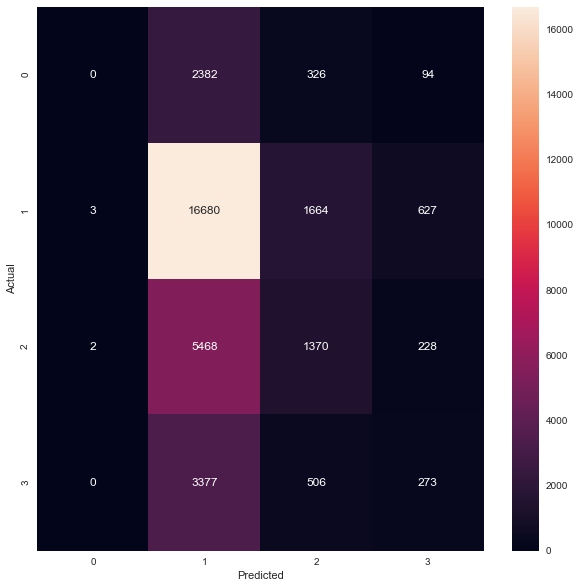

In [53]:
y_pred = random_search.predict(X_test)

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig("img_export/confusion_matrix_ovr_nonweighted_absolute.jpg")

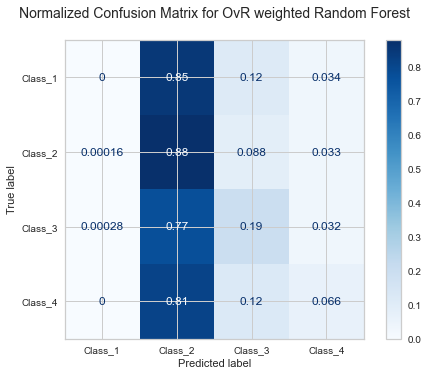

In [54]:
# Plot normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(random_search, X_test, y_test, display_labels=['Class_1','Class_2','Class_3','Class_4'], 
                      cmap=plt.cm.Blues, normalize="true")
plt.title("Normalized Confusion Matrix for OvR weighted Random Forest\n", size=14)
plt.savefig("img_export/confusion_matrix_ovr_weighted.jpg")

In [55]:
from sklearn.metrics import f1_score

print("F1 score after random search: " + str(f1_score(y_test, y_pred, average="weighted")))

F1 score after random search: 0.4756008072540943


In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Class_1       0.00      0.00      0.00      2802
     Class_2       0.60      0.88      0.71     18974
     Class_3       0.35      0.19      0.25      7068
     Class_4       0.22      0.07      0.10      4156

    accuracy                           0.56     33000
   macro avg       0.29      0.28      0.27     33000
weighted avg       0.45      0.56      0.48     33000



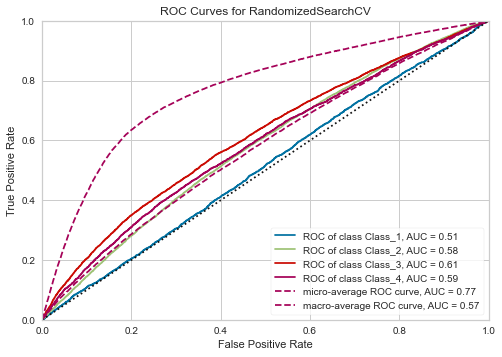

<AxesSubplot:title={'center':'ROC Curves for RandomizedSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [57]:
# multiple ROC curves using yellowbrick
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(random_search, classes=['Class_1','Class_2','Class_3','Class_4'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

### Repeat OvO weighted for the whole training data set

Based on micro-average and macro-average ROC_AUC, all four are more less the same. OVR_weighted has the highest F1-score (difference in third decimal place though) and OVO_weighted the highest roc_auc score (second decimal place).

In [61]:
X_train = train_df.drop(columns=["target", "id"])
y_train = train_df.target

X_submit = submit_df.drop(columns=["id"])

In [62]:
# Standardize numeric features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_trans = scaler.fit_transform(X_train)
X_submit_trans = scaler.transform(X_submit)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(class_weight='balanced')

random_search = RandomizedSearchCV(estimator=rnd_clf, 
                                   param_distributions=param_dist,
                                   scoring='roc_auc_ovo_weighted',
                                   n_iter=50,
                                   n_jobs=-1, 
                                   cv=3, 
                                   verbose=10, 
                                   random_state=42)

random_search.fit(X_train_trans, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [27]:
print(random_search.best_params_)

{'n_estimators': 1425, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 800, 'bootstrap': True}


In [28]:
print(random_search.best_score_)

0.5659873482941177


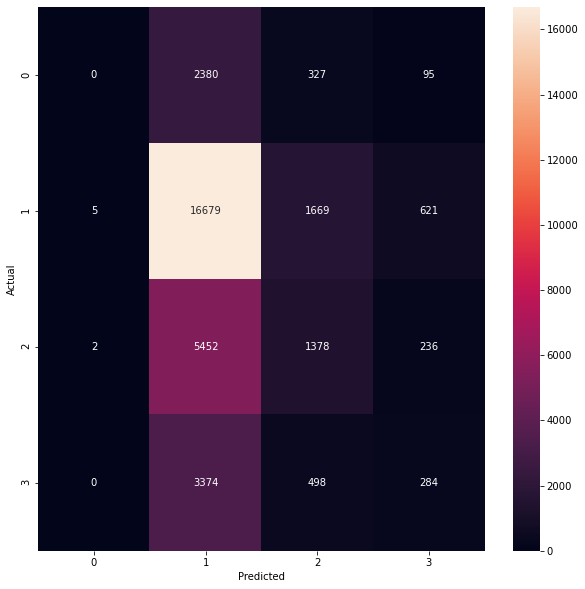

In [29]:
y_pred = random_search.predict(X_test)

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig("img_export/confusion_matrix_ovo_weighted_absolute_fulltraindata.jpg")

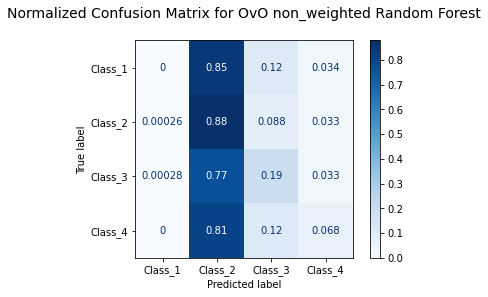

In [30]:
# Plot normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(random_search, X_test, y_test, display_labels=['Class_1','Class_2','Class_3','Class_4'], 
                      cmap=plt.cm.Blues, normalize="true")
plt.title("Normalized Confusion Matrix for OvO weighted Random Forest\n", size=14)
plt.savefig("img_export/confusion_matrix_ovo_weighted_normalized_fulltraindata.jpg")

In [31]:
from sklearn.metrics import f1_score

print("F1 score after random search: " + str(f1_score(y_test, y_pred, average="weighted")))

F1 score after random search: 0.47653281529083746


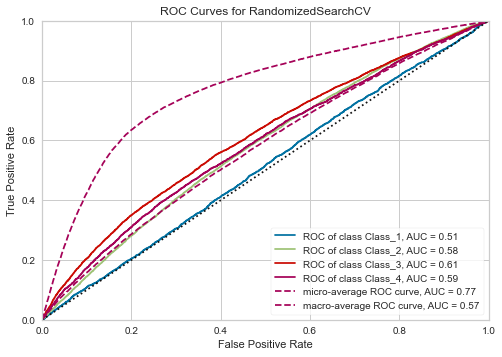

<AxesSubplot:title={'center':'ROC Curves for RandomizedSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [57]:
# multiple ROC curves using yellowbrick
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(random_search, classes=['Class_1','Class_2','Class_3','Class_4'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

In [ ]:
# Predict and Export

import datetime as datetime

y_submit = random_search.predict(X_submit)

export_df = pd.DataFrame()
export_df["id"] = pd.read_csv("input/test.csv")["id"]
export_df["target"] = y_submit
now = datetime.datetime.now()
name_add = "date_"+str(now.year)+"-"+str(now.month)+"-"+str(now.day)+"_time_"+str(now.hour)+"-"+str(now.minute)
export_df.head()
#export_df.to_csv(f"output/_{name_add}.csv", index=False)


## 3. Experimenting with simple DNNs

In [ ]:
X_train = pd.DataFrame(X_train_pre.toarray())
X_valid = pd.DataFrame(X_test_pre.toarray())
X_submit = pd.DataFrame(X_submit_pre.toarray())

y_train = y_train
y_valid = y_test

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Model definition
model = keras.models.Sequential([
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

# specify loss function and optimizer
model.compile(loss="binary_crossentropy",
             optimizer="sgd",
             metrics=["accuracy", "AUC"])

In [ ]:
# fit the model
history = model.fit(X_train, y_train, epochs=100, 
                    validation_data=(X_valid, y_valid),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

In [ ]:
# plot learning curves
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.8,0.9)

In [ ]:
model.evaluate(X_valid, y_valid)

In [ ]:
model.predict(X_submit)

In [ ]:
import datetime as datetime

y_submit = model.predict(X_submit)

export_df = pd.DataFrame()
export_df["id"] = pd.read_csv("input/test.csv")["id"]
export_df["target"] = y_submit
now = datetime.datetime.now()
name_add = "date_"+str(now.year)+"-"+str(now.month)+"-"+str(now.day)+"_time_"+str(now.hour)+"-"+str(now.minute)
export_df.to_csv(f"output/sequential_ANN_{name_add}.csv", index=False)